# STAT 479 Final

## Juan J. Lopez

The purpose of this project is to determine the ability to identify the health quality of Guava fruit using a Convolutional Neural Network.

## Dataset Information:
This dataset was taken from Kaggle.com, containing 3784 images of: <ul><li>928 images of healthy guava fuits.</li> <li>1544 images of guava fruits suffering from Anthracnose.</li> <li>1312 images of guava with fruit flies.</li></ul><br> The images have uniform size of 512x512.<br><br> [Guava Dataset](https://www.kaggle.com/datasets/asadullahgalib/guava-disease-dataset)


## Relevant Packages:

In [54]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras as keras

In [55]:
import cv2

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, LeakyReLU, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

## Dataset Import, Size reduction, Normalization and Split: 

<ul><li>Tensorflow and keras packages are used to import the data. This way the pixel readjustment of the data can be done directly through the function.</li><li>The data is then normalized by diving by the max value found from a batch found during the data exploration process.</li><li>After normalizing, the data is split into an 80% training, 10% testing and 10% validation split.</li></ul>

In [26]:
data= tf.keras.utils.image_dataset_from_directory('C:\\Users\\Jo\\Documents\\Notebooks\\Guava', image_size=(128,128), labels='inferred',label_mode='int',seed=123)

data = data.map(lambda x,y: (x/255,y))
len(data)

train_size=int(len(data)*.8)
test_size=int(len(data)*.1)+1
val_size=int(len(data)*.1)+1

Found 3784 files belonging to 3 classes.


There are 119 batches of 32 images in the total dataset. We had to add another batch to propotortion of test and validation length to get an even get a 80-10-10 split to get the 119 number.

In [27]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [37]:
scaled_iterator = train.as_numpy_iterator()
batch=scaled_iterator.next()
print('Data after normalization: ',batch[0].max())

Data after normalization:  1.0


In [38]:
train_iterator = train.as_numpy_iterator()
train_batch=train_iterator.next()
train_batch[0].shape

(32, 128, 128, 3)

From the shape we can tell that there are 32 images in a batch of size 128x128 with RGB.

In [39]:
train_batch[1]

array([1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 2, 1, 0, 2, 1, 2, 1, 1, 0, 1, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 1, 2])

Visual examples of a batch:

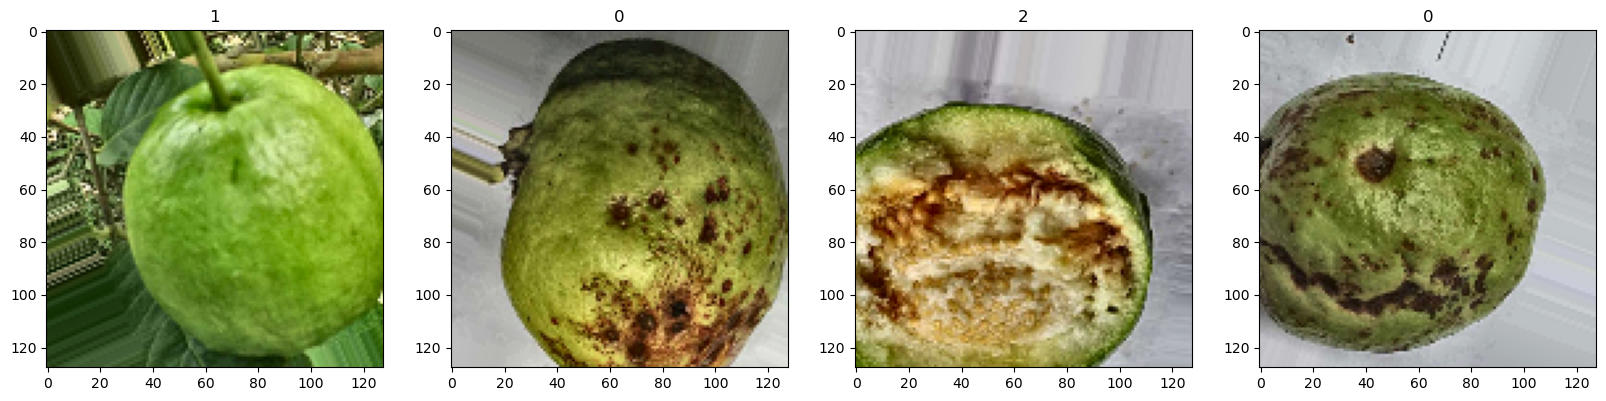

In [40]:
fig, ax=plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(train_batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(train_batch[1][idx])

By looking at the batches we can determine number associated for each classification of the guava states:<br><i>Anthracnose=0</i><br><i>Healthy=1</i><br><i>Fruit Flies=2</i>

## Convolutional Neural Network:

### Model 1:
The first layer contains: <li><ul>The input shape is: 128,128,3. The same size of all images with RGB.</ul><ul>The first convolution layer has 32 filters of 4x4 size and a relu activation.</ul></li><ul>Maxpooling2D is included with default values of 2x2.</ul><ul>Dropout is included with a value of 0.2.</ul></li>The second layer has 64 filters of fize 4x4.<br><br> The third layer has 128 filters of size 4x4.<br><br>Flatten is done to send to an output layers with channel and softmax activation function for 3 classifications.<br><br>The model is compiled with an adam optimizer of default learning rate of 0.001, sparse_categorical_crossentropy for loss and accuracy metrics. 

In [111]:
model_1= Sequential()
model_1.add(Conv2D(32,(4,4),1, activation='relu', input_shape=(128,128,3)))
model_1.add(MaxPooling2D())
model_1.add(Dropout(0.2))
model_1.add(Conv2D(64,(4,4),1, activation='relu'))
model_1.add(MaxPooling2D())
model_1.add(Dropout(0.2))
model_1.add(Conv2D(128,(4,4),1, activation='relu'))
model_1.add(MaxPooling2D())
model_1.add(Dropout(0.2))
model_1.add(Flatten())

model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(3, activation='softmax'))

model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [112]:
model_1.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_37 (Conv2D)              │ (None, 125, 125, 32)   │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 59, 59, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 26, 26, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │     2,769,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,935,011 (11.20 MB)

 Trainable params: 2,935,011 (11.20 MB)

 Non-trainable params: 0 (0.00 B)

The model1 summary indicates a total of 2,935,011 parameters are tested.

Model_1 is fit with a batch size of 32 and 20 epochs with validation data.

In [114]:
hist1=model_1.fit(train, epochs=20, validation_data=val)

Epoch 1/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 44s 447ms/step - accuracy: 0.8230 - loss: 0.4497 - val_accuracy: 0.8958 - val_loss: 0.2833
Epoch 2/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 44s 451ms/step - accuracy: 0.8834 - loss: 0.2854 - val_accuracy: 0.9010 - val_loss: 0.2288
Epoch 3/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 44s 452ms/step - accuracy: 0.9009 - loss: 0.2525 - val_accuracy: 0.8568 - val_loss: 0.3227
Epoch 4/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 44s 451ms/step - accuracy: 0.9253 - loss: 0.1808 - val_accuracy: 0.9661 - val_loss: 0.1080
Epoch 5/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 43s 448ms/step - accuracy: 0.9486 - loss: 0.1331 - val_accuracy: 0.9688 - val_loss: 0.1034
Epoch 6/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 43s 447ms/step - accuracy: 0.9529 - loss: 0.1259 - val_accuracy: 0.9714 - val_loss: 0.0966
Epoch 7/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 43s 450ms/step - accuracy: 0.9727 - loss: 0.0730 - val_accuracy: 0.9531 - val_loss: 0.1422
Epoch 8/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 43s 450ms/step - accuracy: 0.9671 - loss: 0.0870 - val_accu

## Model Evaluation
### Graphs:

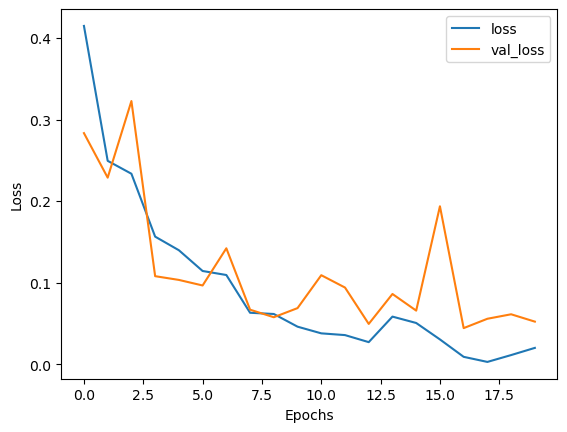

In [116]:
plt.plot(hist1.history['loss'], label='loss')
plt.plot(hist1.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The loss plot shows that loss drops to very low values while the validation loss is also small, but has jumps on the 2nd, 10th and 15th epoch. Indicating some missclassifications.

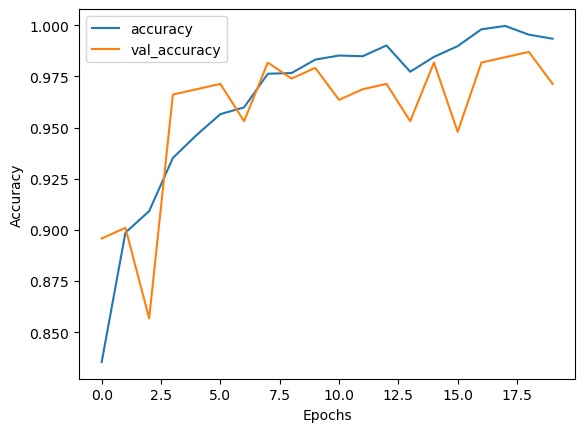

In [117]:
plt.plot(hist1.history['accuracy'], label='accuracy')
plt.plot(hist1.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The Accuracy plots show training accuracy is very high while validation accuracy stay within a range of 0.95 after the 2nd epoch.

In [133]:
print('The accuracy of the validation data 0.9714 and the accuracy of the testing data for model 1 is: ',np.round((model_1.evaluate(test)),4))

12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.9644 - loss: 0.0886
The accuracy of the validation data 0.9714 and the accuracy of the testing data for model 1 is:  [0.0819 0.9667]


The accuracy of the test data shows that the model 1 is very accurate at classifying guava fruits.

### Confusion Matrix:

In [121]:
y_pred=[]
y_true=[]
for x,y in test:
    y_pred.extend(np.argmax(model_1.predict(x),axis=1))
    y_true.extend(y.numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


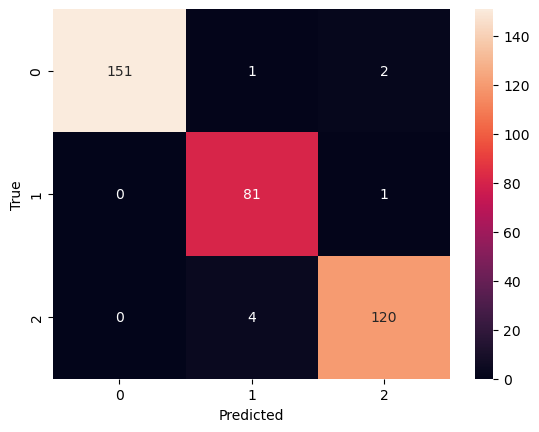

In [122]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The confusion matrix shows that model missclassfied the following images as: <ul><li>4 fruit flies as healthy.</li><li> 1 fruit flies as healthy.</li> <li>1 Anthracnose as healthy.</li> <li>2 Anthracnose as fruit flies.</li></ul>

In [130]:
misclass_img = []
misclass_labs = []
true_labs = []

for images, labels in test:
    batch_pred = model_1.predict(images)
    predicted_lab = np.argmax(batch_pred, axis=1)
    misclass = np.where(predicted_lab != labels.numpy())[0]

    for i in misclass:
        misclass_img.append(images[i].numpy())
        misclass_labs.append(predicted_lab[i])
        true_labs.append(labels[i].numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


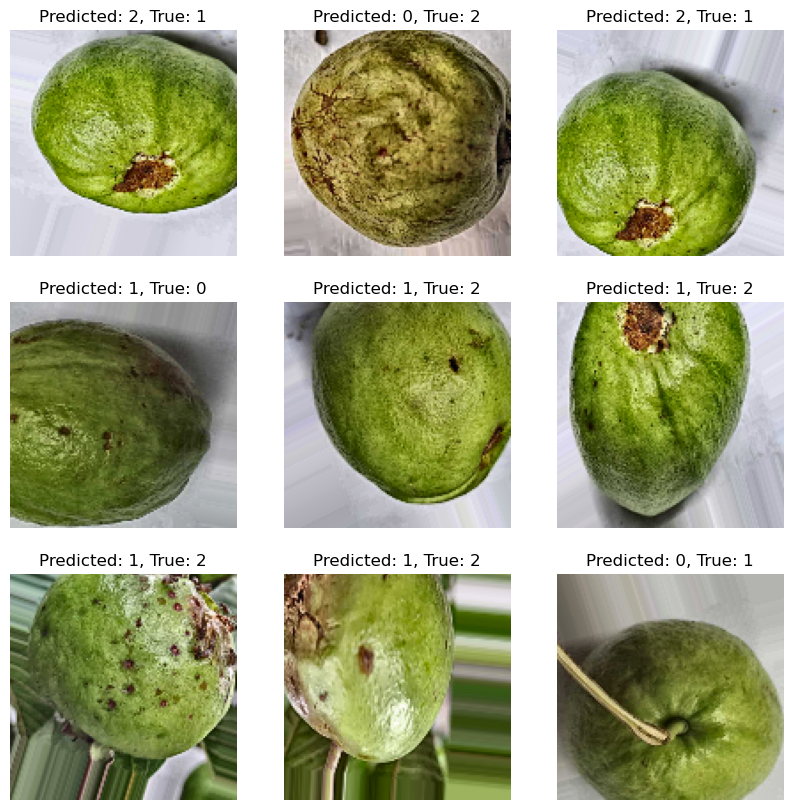

In [131]:
plt.figure(figsize=(10, 10))
for i in range(min(9, len(misclass_img))):
    plt.subplot(3, 3, i + 1)
    plt.imshow(misclass_img[i])
    plt.title(f"Predicted: {misclass_labs[i]}, True: {true_labs[i]}")
    plt.axis("off")
plt.show()

There are images that are ambiguous, as such #2 which has characteristics of Anthracnose but in reality is a decomposing fruit besieged by fruit flies. Images #1,#3,#6 and #9 are training issues where, the model cannot differentiation between the flower spot and fruit flies. Images #4 and #5 misclafisscations because the images are of fruits with early symptoms.

## Experimentation:

### Model 2:

The first layer contains: <li><ul>The input shape is: 128,128,3. The same size of all images with RGB.</ul><ul>The first convolution layer has 32 filters of 4x4 size, kernel_initializer 'random_uniform' and a LeakyReLU activation with a negative slope of 0.2.</ul></li><ul>Maxpooling2D of 3x3.</ul><ul>Dropout is included with a value of 0.2.</ul></li>The second layer has 64 filters of fize 4x4, kernel_initializer 'random_uniform' and a LeakyReLU activation with a negative slope of 0.2.<br><br> The third layer has 128 filters of size 4x4, kernel_initializer 'random_uniform' and a LeakyReLU activation with a negative slope of 0.2.<br><br>Flatten is done to send to an output layers with channel and softmax activation function for 3 classifications.<br><br>The model is compiled with an adam optimizer with learning rate of 0.0001, sparse_categorical_crossentropy for loss and accuracy metrics. 

In [47]:
model_2= Sequential()
model_2.add(Conv2D(32,(4,4),1, kernel_initializer='random_uniform',input_shape=(128,128,3)))
model_2.add(LeakyReLU(negative_slope=0.2))
model_2.add(MaxPooling2D(3,3))
model_2.add(Dropout(0.2))
model_2.add(Conv2D(64,(4,4),1,kernel_initializer='random_uniform'))
model_2.add(LeakyReLU(negative_slope=0.2))
model_2.add(MaxPooling2D(3,3))
model_2.add(Conv2D(128,(4,4),1,kernel_initializer='random_uniform'))
model_2.add(Dropout(0.2))
model_2.add(LeakyReLU(negative_slope=0.2))
model_2.add(MaxPooling2D(3,3))
model_2.add(Dropout(0.2))
model_2.add(Flatten())

model_2.add(Dense(128))
model_2.add(LeakyReLU(negative_slope=0.2))
model_2.add(Dense(3, activation='softmax'))

model_2.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [48]:
model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 125, 125, 32)   │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 125, 125, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 41, 41, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 41, 41, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 38, 38, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_13 (LeakyReLU)      │ (None, 38, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 9, 9, 128)      │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_14 (LeakyReLU)      │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_15 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 313,571 (1.20 MB)

 Trainable params: 313,571 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

The smaller learning rate means that more epochs are included relative to the first model.

In [49]:
hist2=model_2.fit(train, epochs=40, validation_data=val)

Epoch 1/40
95/95 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.4108 - loss: 1.0604 - val_accuracy: 0.6172 - val_loss: 0.9616
Epoch 2/40
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.6065 - loss: 0.8445 - val_accuracy: 0.7292 - val_loss: 0.6823
Epoch 3/40
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.7245 - loss: 0.6296 - val_accuracy: 0.7422 - val_loss: 0.6392
Epoch 4/40
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.7457 - loss: 0.5639 - val_accuracy: 0.6302 - val_loss: 0.7577
Epoch 5/40
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.7635 - loss: 0.5620 - val_accuracy: 0.8333 - val_loss: 0.4911
Epoch 6/40
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.8335 - loss: 0.4204 - val_accuracy: 0.8411 - val_loss: 0.4077
Epoch 7/40
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.8559 - loss: 0.3550 - val_accuracy: 0.8490 - val_loss: 0.3788
Epoch 8/40
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.8740 - loss: 0.3340 - val_accuracy: 0.8828 - v

## Graphs:

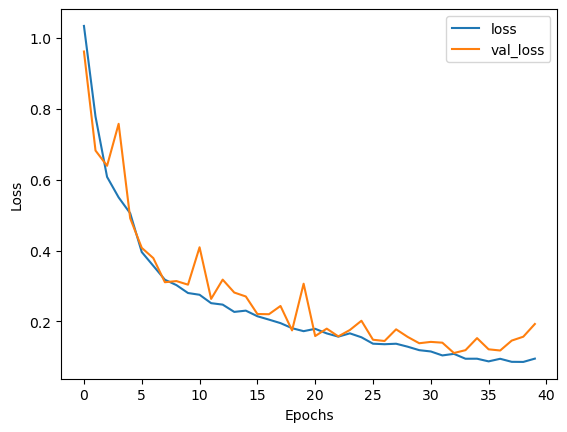

In [50]:
plt.plot(hist2.history['loss'], label='loss')
plt.plot(hist2.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

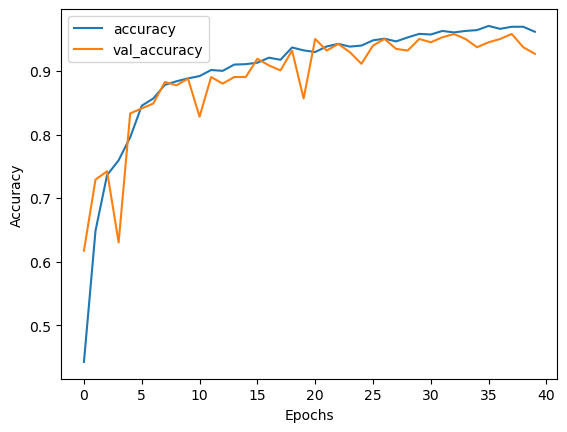

In [51]:
plt.plot(hist2.history['accuracy'], label='accuracy')
plt.plot(hist2.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [52]:
print('The accuracy of the validation data 0.9271 and the accuracy of the testing data for model 2 is: ',np.round((model_2.evaluate(test)),4))

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9369 - loss: 0.1766
The accuracy of the validation data 0.9271 and the accuracy of the testing data for model 2 is:  [0.1915 0.925 ]


Model 2 performs slightly worse than model 1 however the training and testing accuracy are high.

## Conclusions:
<li><ul>Adding model complexity did not improve accuracy of the validation or testing data, it was surpsingly to find that the base model yielded such accurate results.</ul> <ul>The image set lends itself well for convolution.</ul><ul>The most complicated aspect of this project was working with the keras.util function as the provided data has a different syntax than the one I'm used to work with and needed addtional research.</ul></li>

## Bibliography:
<il>- Renote, Nicholas."Build a Deep CNN Image Classifier with ANY Images". April 25, 2022. YouTube. [https://www.youtube.com/watch?v=jztwpsIzEGc](https://www.youtube.com/watch?v=jztwpsIzEGc)</il><br><br>- Datacamp, "Convolutional Neural Networks in Python with Keras". December 5, 2017.datacamp. [https://www.datacamp.com/tutorial/convolutional-neural-networks-python](https://www.datacamp.com/tutorial/convolutional-neural-networks-python)</il><br><br>- NueralNine, "Hyperparameter Tuning For Neural Networks in Python". September 19, 2024.[https://www.youtube.com/watch?v=lKusotIjzwk](https://www.youtube.com/watch?v=lKusotIjzwk)</il> <br><br>- Amin, Md Al; Mahmud, Md Iqbal; Rahman, Asadullah Bin; Parvin, Mst Aktarina; Mamun, Md Abdulla Al (2024), “Guava Fruit Disease Dataset”, Mendeley Data, V1, doi: 10.17632/bkdkc4n835.1